In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import QuantileTransformer
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SelectKBest, RFE, f_regression, SequentialFeatureSelector
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LassoLars
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import TweedieRegressor
import warnings
warnings.filterwarnings("ignore")
import scipy.stats as stats
import wrangle
from sklearn.cluster import KMeans
import scipy.stats as stats


In [2]:
data = pd.read_csv('wines.csv')

In [3]:
data.columns = data.columns.str.replace(' ', '_')
data.shape
data.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,wine_type
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,white
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,white
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,white
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white


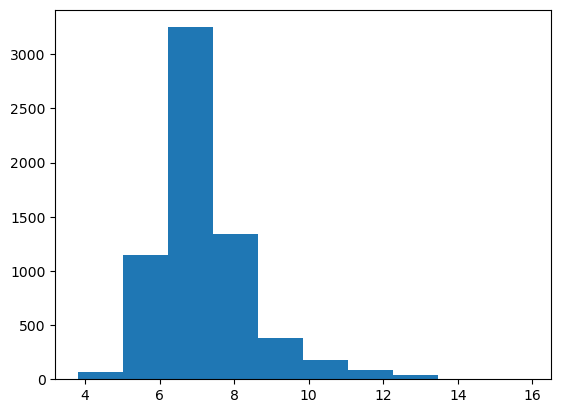

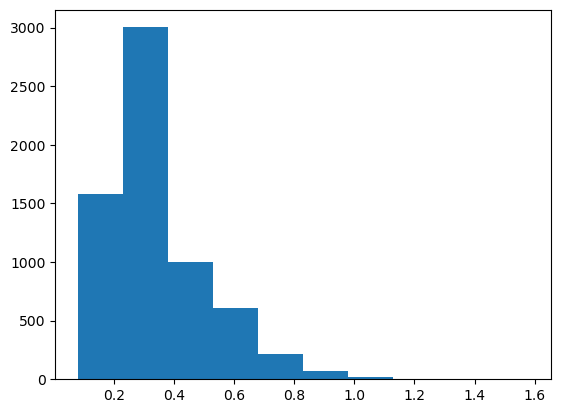

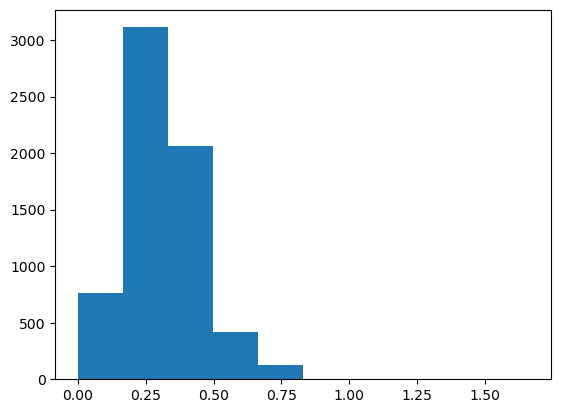

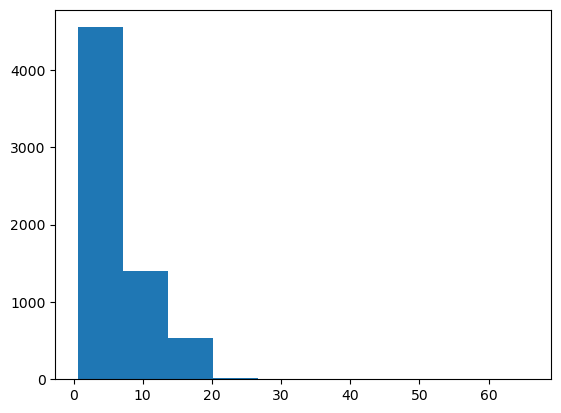

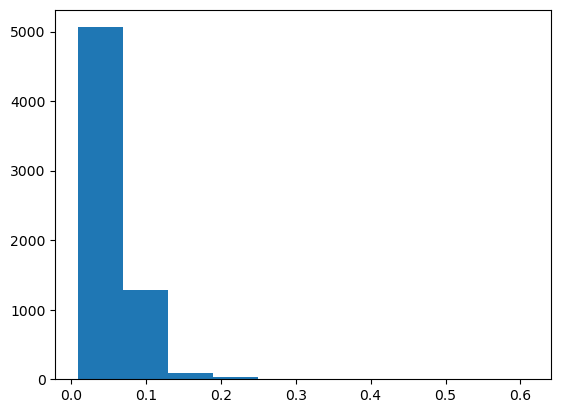

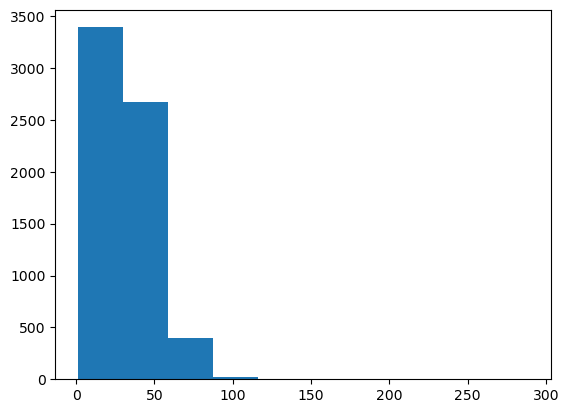

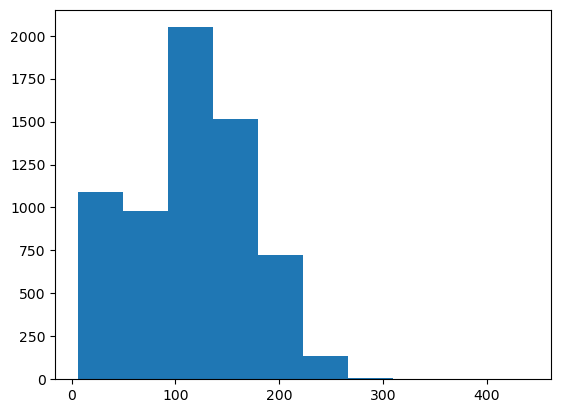

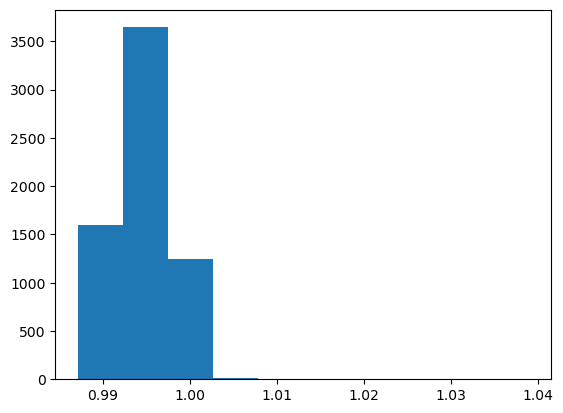

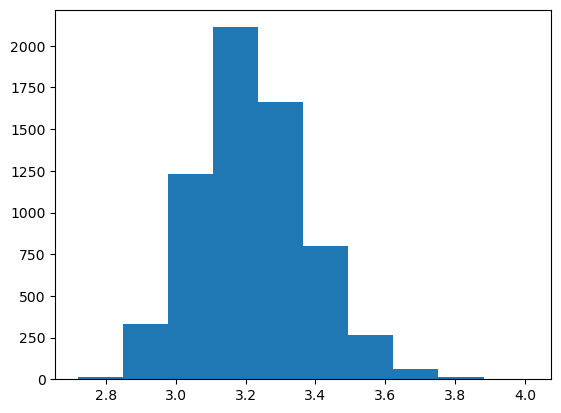

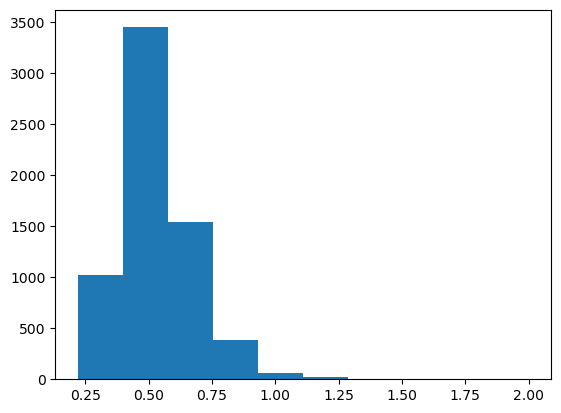

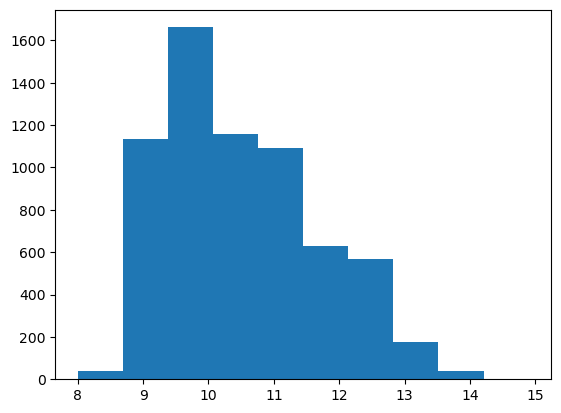

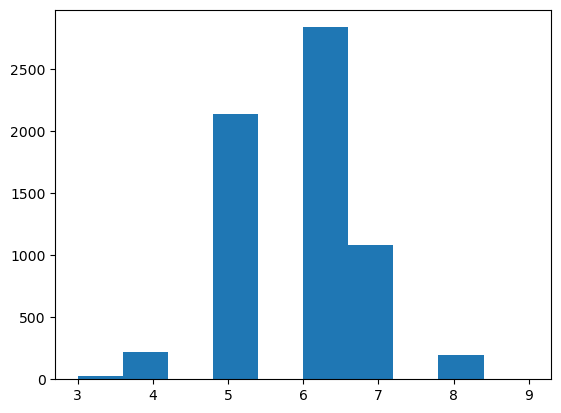

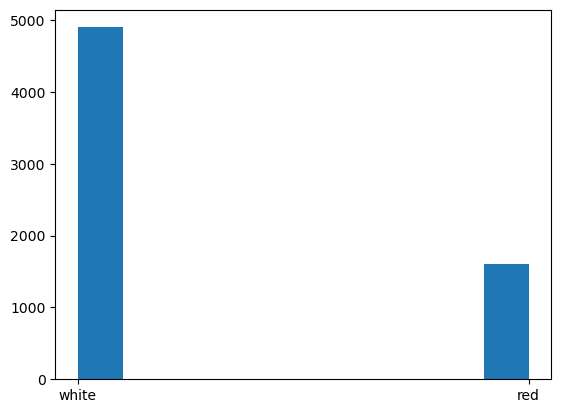

In [4]:
data['fixed_acidity'].sort_values()
columns = data.columns

for col in columns:
    plt.hist(data[col])
    plt.show()


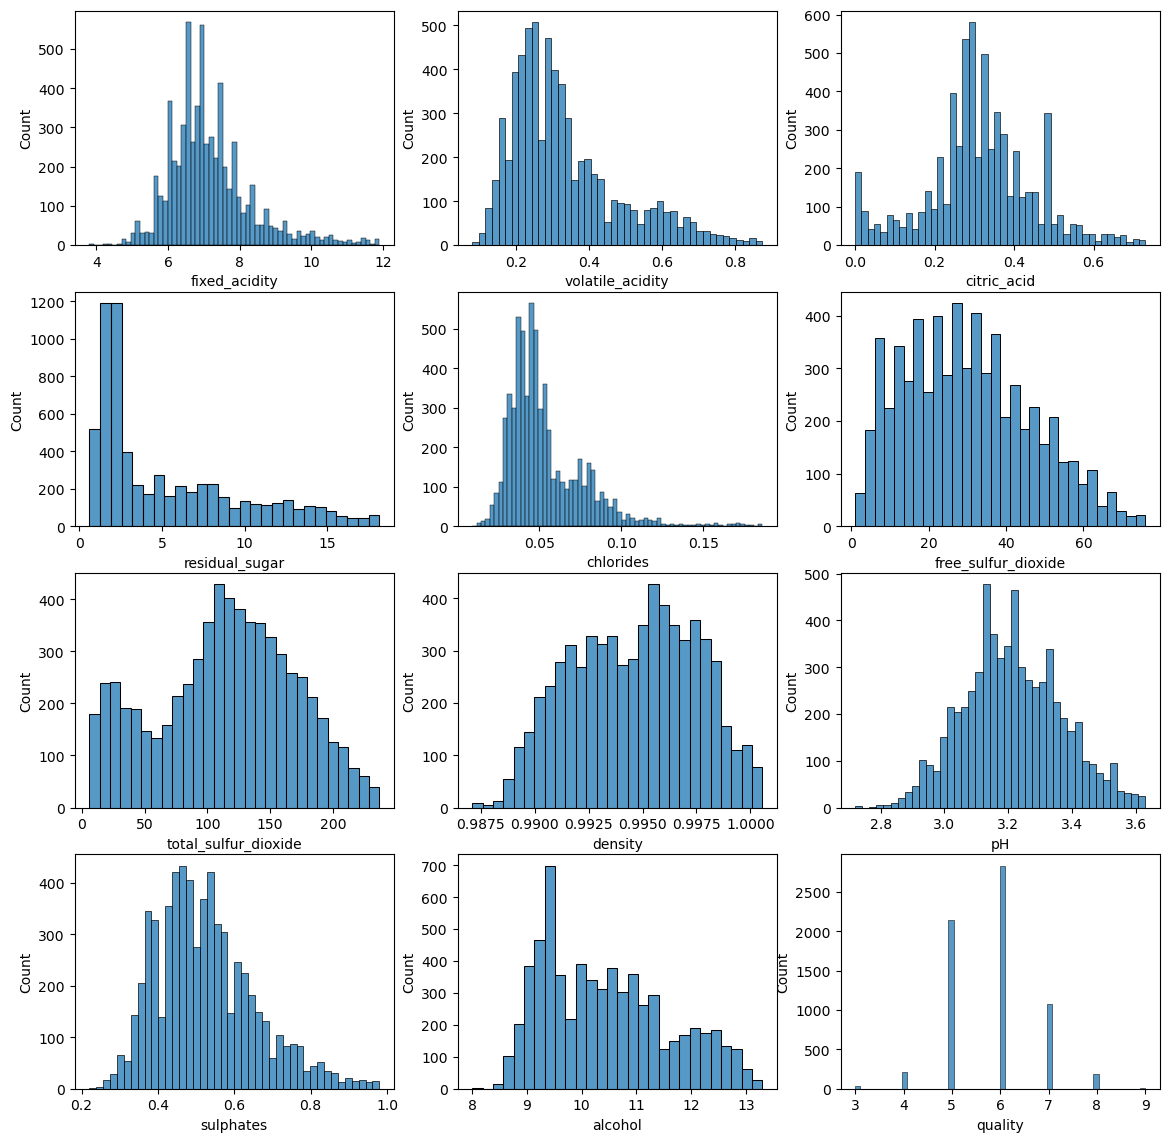

In [5]:
# data = data[data.fixed_acidity < data.fixed_acidity.quantile(.99)].copy()


for i in data.columns:
    if i not in ['wine_type', 'quality']:
        data[i] = data[i][data[i] < data[i].quantile(.99)].copy()
    

plt.figure(figsize=(14,14))
for i, col in enumerate(data.drop(columns='wine_type')):
    plt.subplot(4,3,i+1)
    sns.histplot(data[col])
plt.show()

In [6]:
data.shape

(6497, 13)

In [7]:
data.isnull().sum()

fixed_acidity           67
volatile_acidity        67
citric_acid             74
residual_sugar          66
chlorides               65
free_sulfur_dioxide     67
total_sulfur_dioxide    66
density                 68
pH                      66
sulphates               67
alcohol                 78
quality                  0
wine_type                0
dtype: int64

In [8]:
# data = data.dropna()

In [9]:
data.shape

(6497, 13)

In [10]:
data = wrangle.get_data()

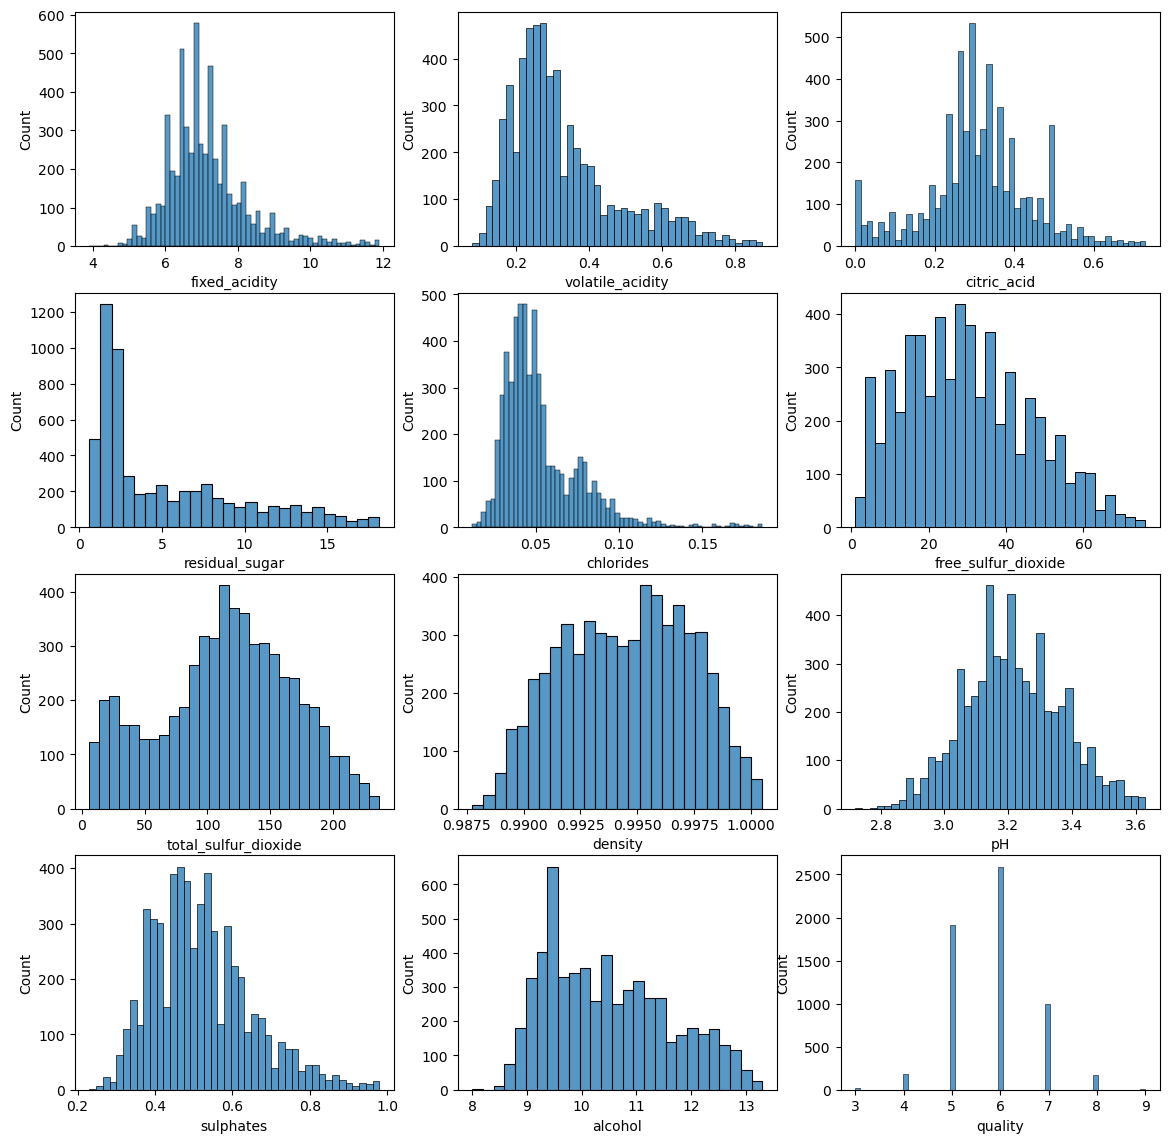

In [11]:
data = wrangle.prepare_data(data)
data
plt.figure(figsize=(14,14))
for i, col in enumerate(data.drop(columns='wine_type')):
    plt.subplot(4,3,i+1)
    sns.histplot(data[col])
plt.show()

In [12]:
data.shape

(5871, 13)

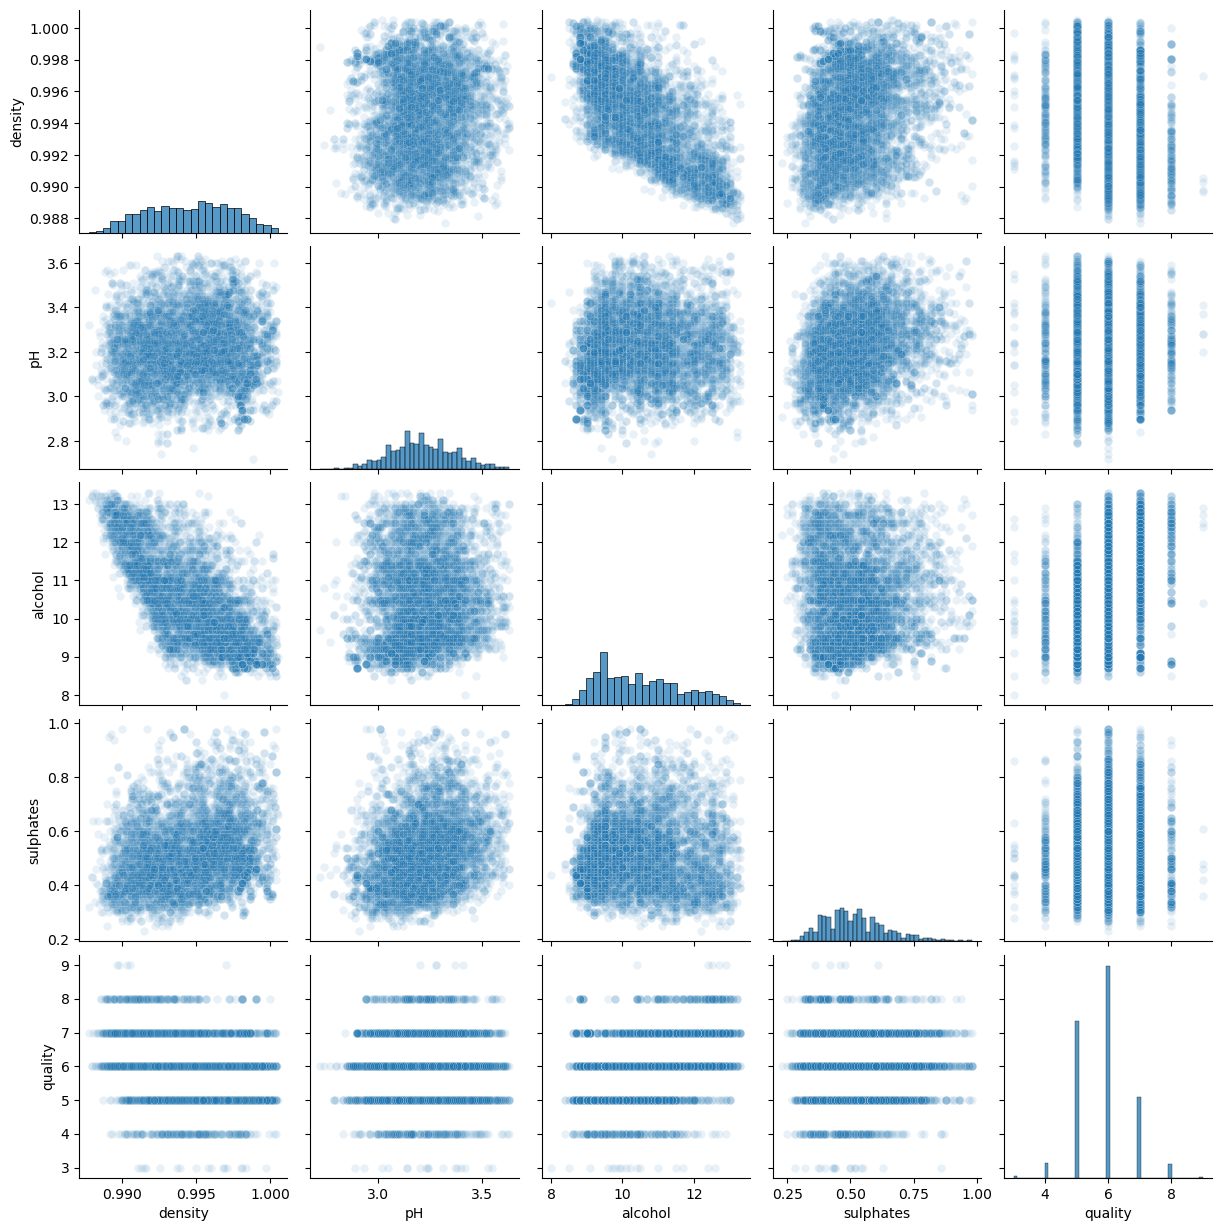

In [ ]:
targets = data[['density','pH','alcohol','sulphates']]

# density, pH, alcohol, and sulphates
sns.pairplot(data[['density','pH','alcohol','sulphates','quality']], plot_kws={'alpha': 0.1})
plt.show()


In [14]:
train, validate, test = wrangle.split_data(data)
train = wrangle.get_dummies_and_hot_encoded(train)
validate = wrangle.get_dummies_and_hot_encoded(validate)
test = wrangle.get_dummies_and_hot_encoded(test)

# corr_df = wrangle.correlation_tests(train)
# means_df = wrangle.comparison_of_means(train)

In [15]:
# corr_df

In [16]:
# means_df

In [17]:


X = train[['fixed_acidity', 'volatile_acidity']]

kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

train['cluster_fix_vol_acid'] = kmeans.predict(X)
train

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,wine_type,cluster_fix_vol_acid,cluster_cit_acd_res_sug,cluster_clorid_diox,wine_type_white,cluster_clorid_diox_1,cluster_clorid_diox_2
1811,7.6,0.38,0.20,3.40,0.046,9.0,116.0,0.99440,3.15,0.41,9.4,5,white,2,0,1,1,1,0
3551,5.7,0.22,0.22,16.65,0.044,39.0,110.0,0.99855,3.24,0.48,9.0,6,white,0,1,2,1,0,1
3338,7.2,0.27,0.28,15.20,0.046,6.0,41.0,0.99665,3.17,0.39,10.9,6,white,2,1,1,1,1,0
1475,7.2,0.08,0.49,1.30,0.050,18.0,148.0,0.99450,3.46,0.44,10.2,6,white,2,0,1,1,1,0
184,6.8,0.26,0.56,11.90,0.043,64.0,226.0,0.99700,3.02,0.63,9.3,5,white,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3386,6.1,0.28,0.27,4.70,0.030,56.0,140.0,0.99042,3.16,0.42,12.5,8,white,0,2,0,1,0,0
740,6.9,0.39,0.40,4.60,0.022,5.0,19.0,0.99150,3.31,0.37,12.6,3,white,2,2,1,1,1,0
628,7.0,0.32,0.24,6.20,0.048,31.0,228.0,0.99570,3.23,0.62,9.4,6,white,2,2,2,1,0,1
1597,6.4,0.27,0.49,7.30,0.046,53.0,206.0,0.99560,3.24,0.43,9.2,6,white,0,2,0,1,0,0


In [18]:
X = train[['citric_acid', 'residual_sugar']]

kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

train['cluster_cit_acd_res_sug'] = kmeans.predict(X)
train

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,wine_type,cluster_fix_vol_acid,cluster_cit_acd_res_sug,cluster_clorid_diox,wine_type_white,cluster_clorid_diox_1,cluster_clorid_diox_2
1811,7.6,0.38,0.20,3.40,0.046,9.0,116.0,0.99440,3.15,0.41,9.4,5,white,2,1,1,1,1,0
3551,5.7,0.22,0.22,16.65,0.044,39.0,110.0,0.99855,3.24,0.48,9.0,6,white,0,2,2,1,0,1
3338,7.2,0.27,0.28,15.20,0.046,6.0,41.0,0.99665,3.17,0.39,10.9,6,white,2,2,1,1,1,0
1475,7.2,0.08,0.49,1.30,0.050,18.0,148.0,0.99450,3.46,0.44,10.2,6,white,2,1,1,1,1,0
184,6.8,0.26,0.56,11.90,0.043,64.0,226.0,0.99700,3.02,0.63,9.3,5,white,0,2,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3386,6.1,0.28,0.27,4.70,0.030,56.0,140.0,0.99042,3.16,0.42,12.5,8,white,0,0,0,1,0,0
740,6.9,0.39,0.40,4.60,0.022,5.0,19.0,0.99150,3.31,0.37,12.6,3,white,2,1,1,1,1,0
628,7.0,0.32,0.24,6.20,0.048,31.0,228.0,0.99570,3.23,0.62,9.4,6,white,2,0,2,1,0,1
1597,6.4,0.27,0.49,7.30,0.046,53.0,206.0,0.99560,3.24,0.43,9.2,6,white,0,0,0,1,0,0


In [19]:
X = train[['chlorides', 'free_sulfur_dioxide']]

kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

train['cluster_clorid_diox'] = kmeans.predict(X)
train

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,wine_type,cluster_fix_vol_acid,cluster_cit_acd_res_sug,cluster_clorid_diox,wine_type_white,cluster_clorid_diox_1,cluster_clorid_diox_2
1811,7.6,0.38,0.20,3.40,0.046,9.0,116.0,0.99440,3.15,0.41,9.4,5,white,2,1,2,1,1,0
3551,5.7,0.22,0.22,16.65,0.044,39.0,110.0,0.99855,3.24,0.48,9.0,6,white,0,2,0,1,0,1
3338,7.2,0.27,0.28,15.20,0.046,6.0,41.0,0.99665,3.17,0.39,10.9,6,white,2,2,2,1,1,0
1475,7.2,0.08,0.49,1.30,0.050,18.0,148.0,0.99450,3.46,0.44,10.2,6,white,2,1,2,1,1,0
184,6.8,0.26,0.56,11.90,0.043,64.0,226.0,0.99700,3.02,0.63,9.3,5,white,0,2,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3386,6.1,0.28,0.27,4.70,0.030,56.0,140.0,0.99042,3.16,0.42,12.5,8,white,0,0,1,1,0,0
740,6.9,0.39,0.40,4.60,0.022,5.0,19.0,0.99150,3.31,0.37,12.6,3,white,2,1,2,1,1,0
628,7.0,0.32,0.24,6.20,0.048,31.0,228.0,0.99570,3.23,0.62,9.4,6,white,2,0,0,1,0,1
1597,6.4,0.27,0.49,7.30,0.046,53.0,206.0,0.99560,3.24,0.43,9.2,6,white,0,0,1,1,0,0


In [20]:
t, p = stats.f_oneway(train['quality'][train['cluster_fix_vol_acid'] == 0],
                     train['quality'][train['cluster_fix_vol_acid'] == 1],
                     train['quality'][train['cluster_fix_vol_acid'] == 2],
                    )

print('T: ', t)
print('P: ', p)

T:  12.199558169883613
P:  5.249070161566638e-06


In [21]:
t, p = stats.f_oneway(train['quality'][train['cluster_cit_acd_res_sug'] == 0],
                     train['quality'][train['cluster_cit_acd_res_sug'] == 1],
                     train['quality'][train['cluster_cit_acd_res_sug'] == 2],
                    )

print('T: ', t)
print('P: ', p)

T:  4.079996276984448
P:  0.016987573872609966


In [22]:
t, p = stats.f_oneway(train['quality'][train['cluster_clorid_diox'] == 0],
                     train['quality'][train['cluster_clorid_diox'] == 1],
                     train['quality'][train['cluster_clorid_diox'] == 2],
                    )

print('T: ', t)
print('P: ', p)

T:  48.28631942410716
P:  2.051672688753812e-21


In [23]:
# dummies_columns = train[['wine_type','cluster_clorid_diox']]
# dummies_columns

# dummy = pd.get_dummies(dummies_columns, columns = dummies_columns.columns, drop_first=True)
# dummy

# train = pd.concat([train, dummy], axis=1)

In [24]:
train

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,wine_type,cluster_fix_vol_acid,cluster_cit_acd_res_sug,cluster_clorid_diox,wine_type_white,cluster_clorid_diox_1,cluster_clorid_diox_2
1811,7.6,0.38,0.20,3.40,0.046,9.0,116.0,0.99440,3.15,0.41,9.4,5,white,2,1,2,1,1,0
3551,5.7,0.22,0.22,16.65,0.044,39.0,110.0,0.99855,3.24,0.48,9.0,6,white,0,2,0,1,0,1
3338,7.2,0.27,0.28,15.20,0.046,6.0,41.0,0.99665,3.17,0.39,10.9,6,white,2,2,2,1,1,0
1475,7.2,0.08,0.49,1.30,0.050,18.0,148.0,0.99450,3.46,0.44,10.2,6,white,2,1,2,1,1,0
184,6.8,0.26,0.56,11.90,0.043,64.0,226.0,0.99700,3.02,0.63,9.3,5,white,0,2,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3386,6.1,0.28,0.27,4.70,0.030,56.0,140.0,0.99042,3.16,0.42,12.5,8,white,0,0,1,1,0,0
740,6.9,0.39,0.40,4.60,0.022,5.0,19.0,0.99150,3.31,0.37,12.6,3,white,2,1,2,1,1,0
628,7.0,0.32,0.24,6.20,0.048,31.0,228.0,0.99570,3.23,0.62,9.4,6,white,2,0,0,1,0,1
1597,6.4,0.27,0.49,7.30,0.046,53.0,206.0,0.99560,3.24,0.43,9.2,6,white,0,0,1,1,0,0


In [25]:
# pd.concat(train.iloc[], train.iloc[])

In [26]:
cols = ['alcohol', 'density']

In [27]:
train_scaled, validate_scaled, test_scaled =  wrangle.scale_data(train,
               validate,
               test
               )

In [28]:
train_scaled

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,wine_type,cluster_fix_vol_acid,cluster_cit_acd_res_sug,cluster_clorid_diox,wine_type_white,cluster_clorid_diox_1,cluster_clorid_diox_2
1811,7.6,0.38,0.20,3.40,0.046,9.0,116.0,0.514331,3.15,0.41,0.264151,5,white,2,1,2,1,1,0
3551,5.7,0.22,0.22,16.65,0.044,39.0,110.0,0.844745,3.24,0.48,0.188679,6,white,0,2,0,1,0,1
3338,7.2,0.27,0.28,15.20,0.046,6.0,41.0,0.693471,3.17,0.39,0.547170,6,white,2,2,2,1,1,0
1475,7.2,0.08,0.49,1.30,0.050,18.0,148.0,0.522293,3.46,0.44,0.415094,6,white,2,1,2,1,1,0
184,6.8,0.26,0.56,11.90,0.043,64.0,226.0,0.721338,3.02,0.63,0.245283,5,white,0,2,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3386,6.1,0.28,0.27,4.70,0.030,56.0,140.0,0.197452,3.16,0.42,0.849057,8,white,0,0,1,1,0,0
740,6.9,0.39,0.40,4.60,0.022,5.0,19.0,0.283439,3.31,0.37,0.867925,3,white,2,1,2,1,1,0
628,7.0,0.32,0.24,6.20,0.048,31.0,228.0,0.617834,3.23,0.62,0.264151,6,white,2,0,0,1,0,1
1597,6.4,0.27,0.49,7.30,0.046,53.0,206.0,0.609873,3.24,0.43,0.226415,6,white,0,0,1,1,0,0


In [29]:
train_scaled.iloc[:, 16:]

,wine_type_white,cluster_clorid_diox_1,cluster_clorid_diox_2
1811,1,1,0
3551,1,0,1
3338,1,1,0
1475,1,1,0
184,1,0,0
...,...,...,...
3386,1,0,0
740,1,1,0
628,1,0,1
1597,1,0,0


In [30]:
train_scaled.iloc[:, 13:15]

,cluster_fix_vol_acid,cluster_cit_acd_res_sug
1811,2,1
3551,0,2
3338,2,2
1475,2,1
184,0,2
...,...,...
3386,0,0
740,2,1
628,2,0
1597,0,0


In [31]:
X_train = train_scaled[['alcohol', 'density', 'wine_type_white', 'cluster_clorid_diox_1', 'cluster_clorid_diox_2']]
X_validate = validate_scaled[['alcohol', 'density', 'wine_type_white', 'cluster_clorid_diox_1', 'cluster_clorid_diox_2']]
X_test = test_scaled[['alcohol', 'density', 'wine_type_white', 'cluster_clorid_diox_1', 'cluster_clorid_diox_2']]


y_train = train_scaled.quality
y_validate = validate_scaled.quality
y_test = test_scaled.quality


In [32]:
y_test

6185    5
1256    6
3135    6
591     6
4683    6
       ..
2997    6
2147    5
988     5
6176    6
4715    6
Name: quality, Length: 1175, dtype: int64

In [33]:
metrics_train_df, metrics_validate_df, metrics_test_df = wrangle.get_model_numbers(X_train, X_validate, X_test, y_train, y_validate, y_test)

In [34]:
metrics_train_df

,model_train,rmse,r2
0,baseline,0.854524,0.000000
1,ordinary least squared(OLS),0.745613,0.238660
2,lasso lars(lars),0.854524,0.000000
3,Polynomial Regression(poly2),0.737219,0.255705
4,Generalized Linear Model (GLM),0.744901,0.240115


In [35]:
metrics_validate_df

,model_validate,rmse,r2
0,baseline,0.854524,0.000000
1,ordinary least squared(OLS),0.775305,0.218909
2,lasso lars(lars),0.877908,-0.001508
3,Polynomial Regression(poly2),0.770448,0.228664
4,Generalized Linear Model (GLM),0.774245,0.221043


In [36]:
metrics_test_df

,model_validate,rmse,r2
0,baseline,0.854524,0.000000
1,Generalized Linear Model (GLM),0.810000,0.132043


In [37]:
train_scaled.head()
train_scaled['quality_bin'] = pd.qcut(train_scaled.quality, q = 3, labels = ['low','med','high'])
train_scaled['quality_bin'].value_counts()

med     1560
low     1268
high     694
Name: quality_bin, dtype: int64

In [ ]:
X = train[['citric_acid', 'residual_sugar']]

kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

train['cluster_cit_acd_res_sug'] = kmeans.predict(X)
train

In [39]:
features = ['cluster_fix_vol_acid', 'cluster_cit_acd_res_sug']
features
means_df = wrangle.comparison_of_means(train_scaled, features)
means_df

,feature,T,P
0,cluster_fix_vol_acid,12.199558,0.000005
1,cluster_cit_acd_res_sug,4.079996,0.016988


In [ ]:
centroids = pd.DataFrame(kmeans.cluster_centers_, columns=X.columns)
centroids.plot.scatter(y='free_sulfur_dioxide', x='alcohol', c='black', marker='x', s=1000, ax=plt.gca(), label='centroid')